# NK cells

In [ ]:
library(Seurat)
library(harmony)
library(monocle3)
library("clusterProfiler")
library(org.Hs.eg.db)
library(ggplot2)
library(ggthemes)
library(RColorBrewer)
library(pheatmap)
library(ineq)
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(reticulate)
# use_python ("~/.virtualenvs/r-reticulate/lib/python3.7/site-packages")

setwd("/media/inspur/AS2150G2/LDK/sclc_metastasis/")
getwd()

In [2]:
# load data
load("data_out/2.SCLC.filter.rdata")

In [3]:
# subset for NK cells
subset(SCLC.filter,celltype=="NK")->SCLC.NK
ls()

[1] "SCLC.filter" "SCLC.NK"

In [5]:
SCLC.NK
table(SCLC.NK$orig.ident)

An object of class Seurat 
33538 features across 1953 samples within 1 assay 
Active assay: RNA (33538 features, 3000 variable features)
 3 dimensional reductions calculated: pca, umap, harmony


  S1   S2   S3   S4   S5   S6   S7 
  71  208 1165   24  202  237   46 

In [6]:
# seurat pipeline
# SCLC.NK <- NormalizeData(object = SCLC.NK)
SCLC.NK <- findallVariableFeatures(SCLC.NK, selection.method = "vst", nfeatures = 1000) 
SCLC.NK <- ScaleData(SCLC.NK, features = VariableFeatures(object = SCLC.NK))
#SCLC.NK <- ScaleData(SCLC.NK, features = Tgene)

library(reticulate)
# use_python ("~/.virtualenvs/r-reticulate/lib/python3.7/site-packages")

SCLC.NK <- RunPCA(SCLC.NK, npcs = 30, verbose = FALSE, features = VariableFeatures(object = SCLC.NK),seed.use=5) #5
SCLC.NK <- RunHarmony(SCLC.NK, "orig.ident")

SCLC.NK <- RunUMAP(SCLC.NK, umap.method = 'umap-learn',reduction = "harmony", dims = 1:30, metric="correlation",random.seed=10)


Centering and scaling data matrix

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”
Warning message:
“The following arguments are not used: random.seed”


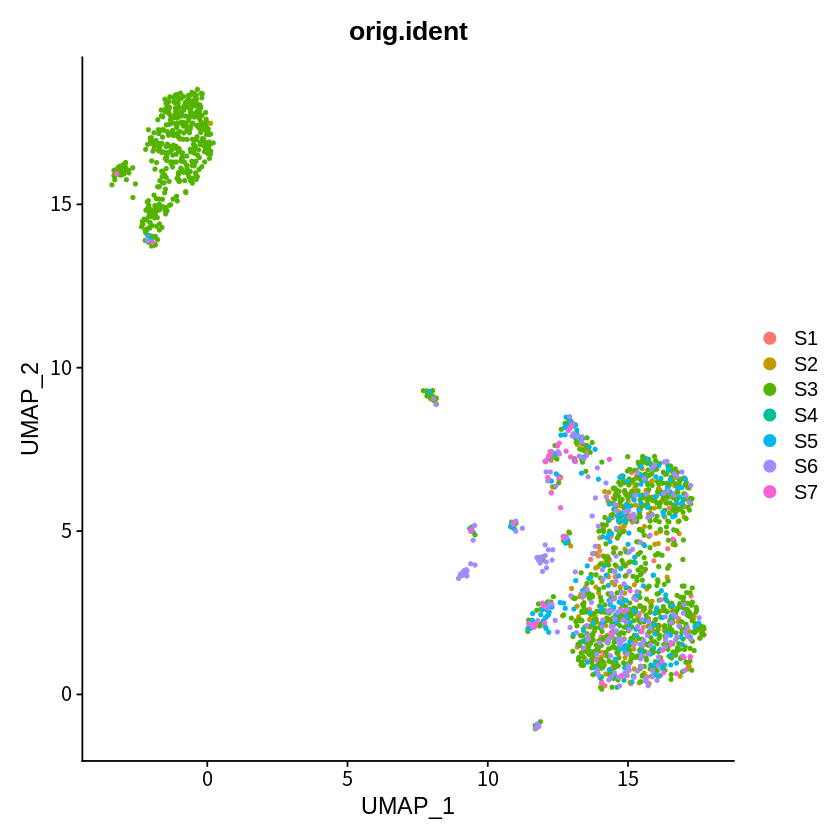

In [7]:
DimPlot(SCLC.NK, reduction = "umap",group.by="orig.ident")
#DimPlot(SCLC.tumor, reduction = "umap",group.by="seurat_clusters",label=T)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1953
Number of edges: 96422

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9028
Number of communities: 5
Elapsed time: 0 seconds



  0   1   2   3   4 
935 426 403 167  22 

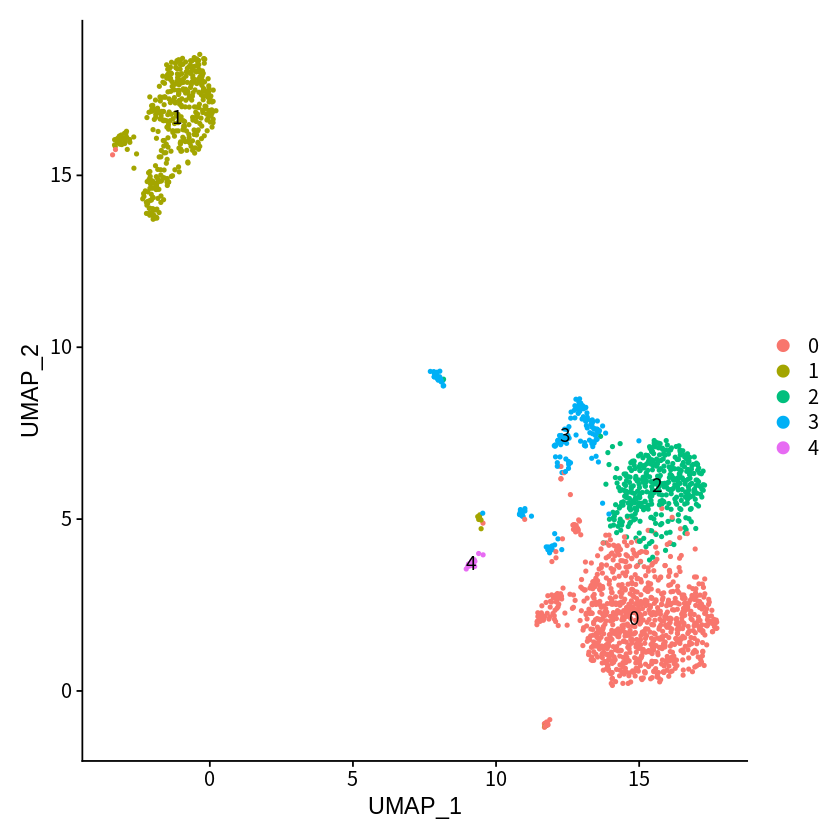

In [8]:
SCLC.NK <- FindNeighbors(SCLC.NK,  reduction="harmony",dims = 1:30)
SCLC.NK <- FindClusters(SCLC.NK,resolution = 0.2)
DimPlot(SCLC.NK, reduction = "umap",label=T,repel=F)  
table(SCLC.NK$seurat_clusters)

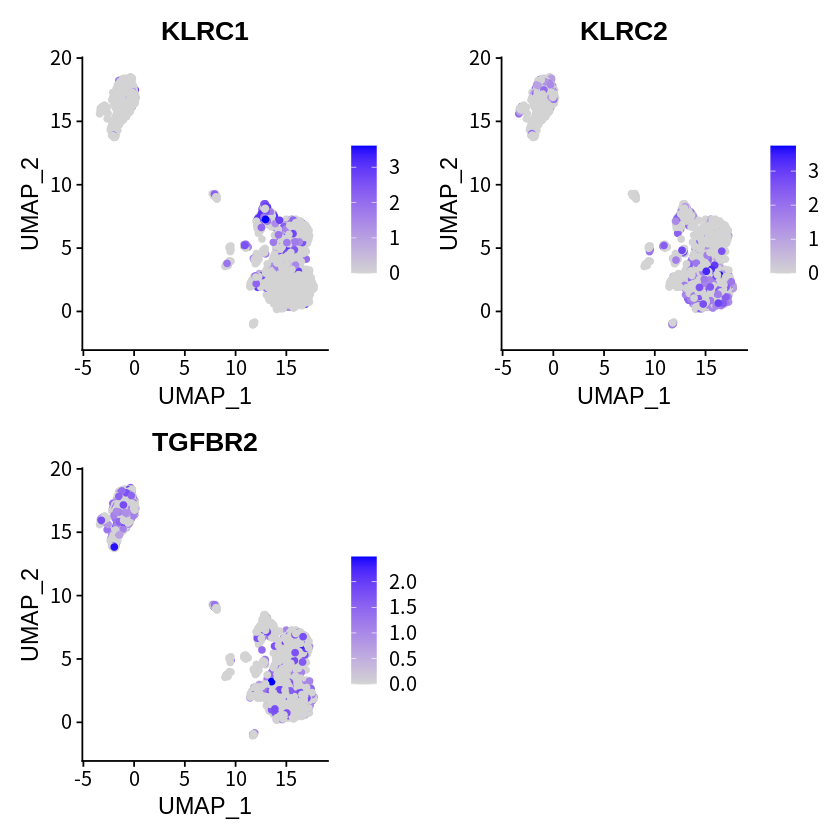

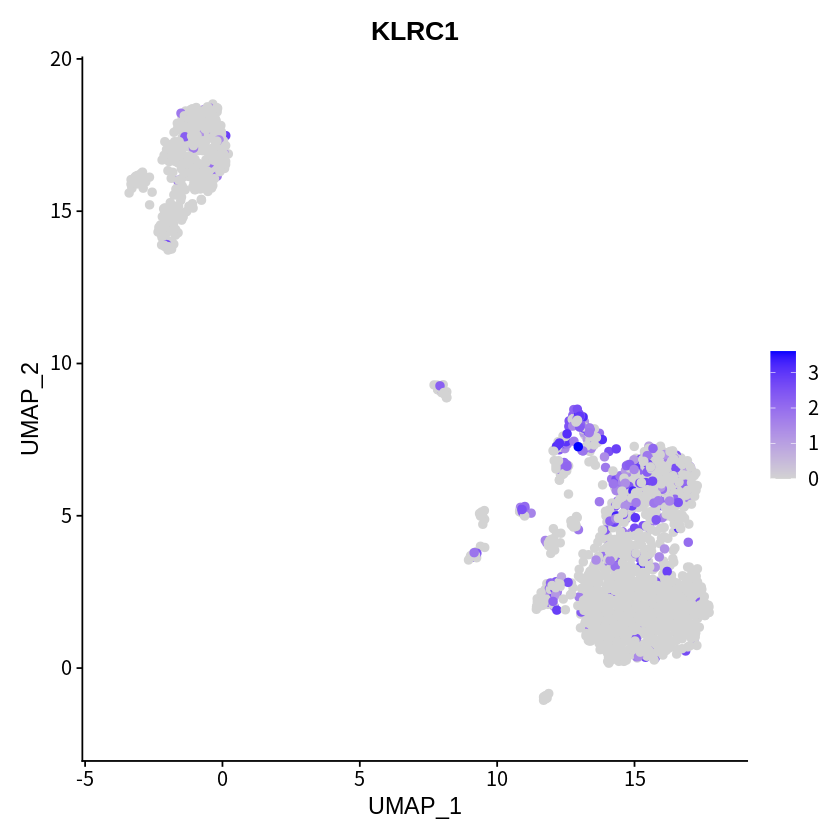

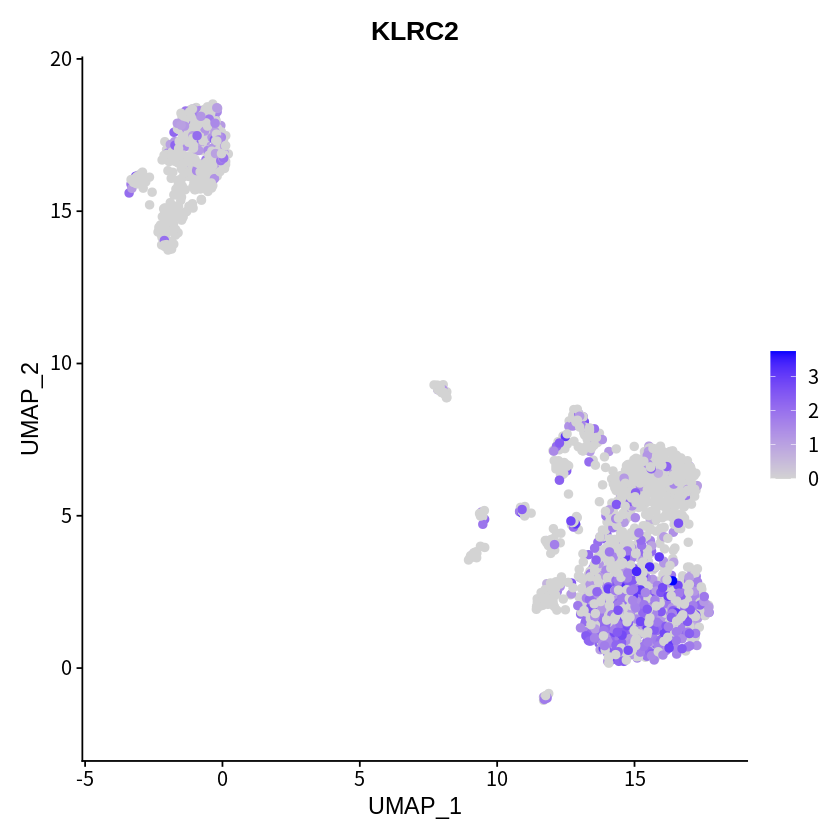

In [49]:
FeaturePlot(SCLC.NK,c("KLRC1","KLRC2","TGFBR2"), pt.size = 1.5)
FeaturePlot(SCLC.NK,c("KLRC1"), pt.size = 2)
FeaturePlot(SCLC.NK,c("KLRC2"), pt.size = 2)

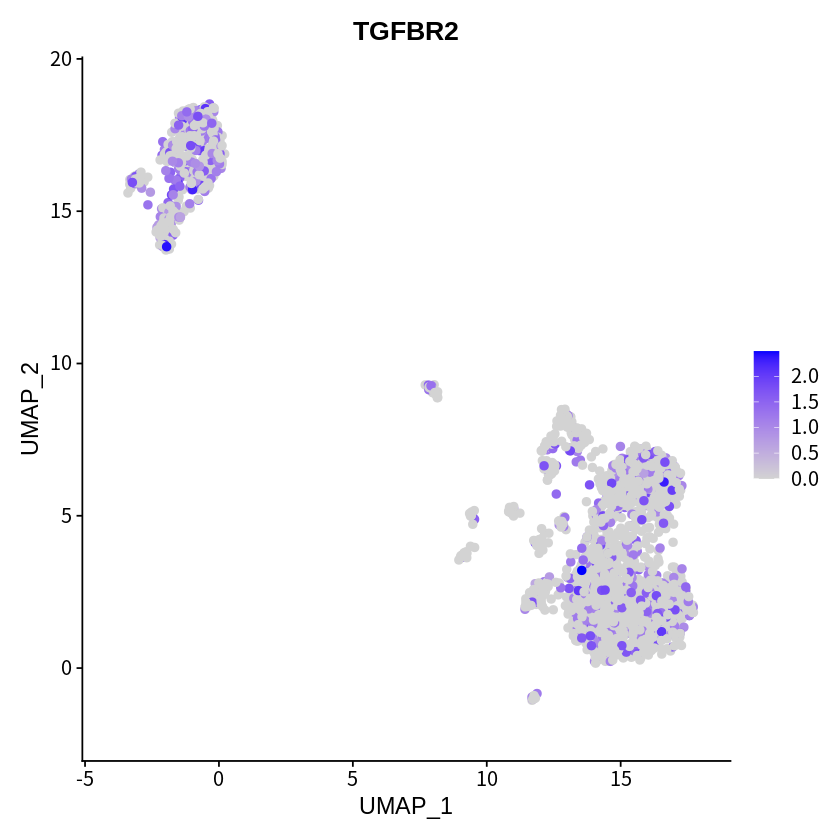

In [50]:
FeaturePlot(SCLC.NK,c("TGFBR2"), pt.size = 2)

In [11]:
NK.markers <- FindAllMarkers(SCLC.NK, only.pos = F, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4



In [12]:
# write.csv(NK.markers, file="table_out/4_NK.markers.csv", quote=F)

In [17]:
library("clusterProfiler")
library(org.Hs.eg.db)


In [18]:
head(NK.markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
FCER1G,7.083579e-112,-1.561124,0.344,0.811,2.375691e-107,0,FCER1G
FOS,1.515596e-109,-2.739303,0.350,0.738,5.083005e-105,0,FOS
CSF3R,3.512257e-101,-2.553914,0.019,0.424,1.177941e-96,0,CSF3R
NAMPT,1.193948e-95,-3.080975,0.095,0.497,4.004263e-91,0,NAMPT
MNDA,1.326542e-94,-2.625022,0.047,0.443,4.448958e-90,0,MNDA
FCGR3B,3.848657e-93,-2.435331,0.039,0.425,1.290763e-88,0,FCGR3B


In [19]:
# GO enrichment analysis of markers of cluster k 
k = 1
NK.markers [which(NK.markers[,"cluster"]==k & NK.markers[,"p_val_adj"]< 0.01 & NK.markers[,"avg_log2FC"]  > 0),"gene"] -> cand_gene

go <- enrichGO(cand_gene ,OrgDb = org.Hs.eg.db, ont='BP',pAdjustMethod = 'fdr',pvalueCutoff = 0.05, qvalueCutoff = 0.05 , keyType = 'SYMBOL')

In [20]:
head(go)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0051607,GO:0051607,defense response to virus,51/579,265/18722,3.831580e-26,9.019539e-23,6.545952e-23,APOBEC3A/MX2/IFITM2/IFIT2/IFIT3/MX1/IFIT1/IFITM3/IFNGR2/HERC5/SEC14L1/RSAD2/STAT1/GBP1/USP15/ITGAX/IRF1/DDX58/ADAR/LYST/IFI44L/IFI6/STAT2/FGL2/PLSCR1/ISG20/IFI16/PTPRC/PARP9/MYD88/TNFAIP3/BIRC3/NLRP1/ISG15/EIF2AK2/DTX3L/NLRC5/NT5C3A/TRIM22/SAMHD1/UNC13D/CARD8/BNIP3L/TRIM56/IRF7/SERINC3/DDX21/IRF2/IRF9/PYCARD/IFITM1,51
GO:0140546,GO:0140546,defense response to symbiont,51/579,265/18722,3.831580e-26,9.019539e-23,6.545952e-23,APOBEC3A/MX2/IFITM2/IFIT2/IFIT3/MX1/IFIT1/IFITM3/IFNGR2/HERC5/SEC14L1/RSAD2/STAT1/GBP1/USP15/ITGAX/IRF1/DDX58/ADAR/LYST/IFI44L/IFI6/STAT2/FGL2/PLSCR1/ISG20/IFI16/PTPRC/PARP9/MYD88/TNFAIP3/BIRC3/NLRP1/ISG15/EIF2AK2/DTX3L/NLRC5/NT5C3A/TRIM22/SAMHD1/UNC13D/CARD8/BNIP3L/TRIM56/IRF7/SERINC3/DDX21/IRF2/IRF9/PYCARD/IFITM1,51
GO:0009615,GO:0009615,response to virus,59/579,367/18722,8.508814e-26,1.335317e-22,9.691091e-23,APOBEC3A/MX2/IFITM2/IFIT2/IFIT3/MX1/IFIT1/IL17RA/IFITM3/IFNGR2/HERC5/SEC14L1/RSAD2/HIF1A/STAT1/GBP1/USP15/ITGAX/BCL3/IRF1/DDX58/ADAR/LYST/IFNAR1/IFI44L/IFI6/STAT2/FGL2/PLSCR1/ISG20/IFI16/MAPK14/PTPRC/PARP9/MYD88/TNFAIP3/BIRC3/IVNS1ABP/NLRP1/NMI/ISG15/EIF2AK2/DDX3X/DTX3L/NLRC5/NT5C3A/TRIM22/SAMHD1/UNC13D/CARD8/BNIP3L/TRIM56/IRF7/SERINC3/DDX21/IRF2/IRF9/PYCARD/IFITM1,59
GO:0019221,GO:0019221,cytokine-mediated signaling pathway,61/579,472/18722,1.530476e-21,1.801370e-18,1.307348e-18,CSF3R/SPI1/ACSL1/CXCR2/CSF2RB/LILRB3/EGR1/TNFSF13B/IFITM2/HCK/IL6R/CXCL8/LILRB2/MX1/CXCR1/IL1R2/IL1B/IL17RA/OSM/IFITM3/IFNGR2/CCR1/IL7R/HIF1A/STAT3/STAT1/PARP14/STAT5B/IRF1/IL4R/ADAR/LAPTM5/IFNAR1/STAT2/RPS6KA5/CBL/JAK3/PTPRJ/PTPRC/PARP9/TNFRSF1B/MYD88/TNFAIP3/NOTCH1/FOXO3/BIRC3/CD44/STAT6/NMI/ISG15/HSPA1A/NLRC5/SAMHD1/CARD8/NFKBIA/IRF7/CASP4/CYLD/TNFRSF1A/PYCARD/IFITM1,61
GO:0001819,GO:0001819,positive regulation of cytokine production,60/579,467/18722,4.526422e-21,4.262079e-18,3.093214e-18,MNDA/PTGS2/C5AR1/AIF1/LRRK2/FFAR2/EGR1/LY96/SLC11A1/CLEC7A/PDE4B/IL6R/LTB/PTAFR/SORL1/LILRB2/IL1B/IL17RA/OSM/NFAM1/TLR4/RSAD2/TLR6/PELI1/CEBPB/HIF1A/STAT3/STAT1/TLR1/CD55/STAT5B/BCL3/IRF1/IL4R/RARA/DDX58/CD46/LAPTM5/PLCG2/PIK3CD/IFI16/MAPK14/PTPRJ/PTPRC/MYD88/GBP5/NLRP1/ISG15/EIF2AK2/DDX3X/HSPA1A/CCDC88B/RGCC/PRKD2/CARD8/TRIM56/IRF7/DDX21/PYCARD/GPSM3,60
GO:0002764,GO:0002764,immune response-regulating signaling pathway,58/579,468/18722,1.249903e-19,9.807574e-17,7.117870e-17,MNDA/FPR1/C5AR1/FFAR2/LY96/CLEC7A/PDE4B/HCK/FPR2/LILRB2/CTSS/CLEC4E/NFAM1/FYB1/TLR4/LYN/SEC14L1/RSAD2/TLR6/PELI1/TLR1/GBP1/USP15/IRF1/NINJ1/DDX58/NFKBIZ/PAK1/LAPTM5/MAP3K1/ARRB2/THEMIS2/PLSCR1/PIK3AP1/PLCG2/PIK3CD/PTPRJ/PTPRC/MYD88/TNFAIP3/BIRC3/CREBBP/PAK2/NMI/DDX3X/HSPA1A/EP300/LCP2/RC3H1/TNIP1/PRKD2/RPS6KA3/NFKBIA/IRF7/CYLD/XIAP/PJA2/ERBIN,58


In [23]:
c("KLRC2","TGFBR2","KLRC1","KLRC1","KLRC1")->new_label #5

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1953
Number of edges: 96422

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9028
Number of communities: 5
Elapsed time: 0 seconds


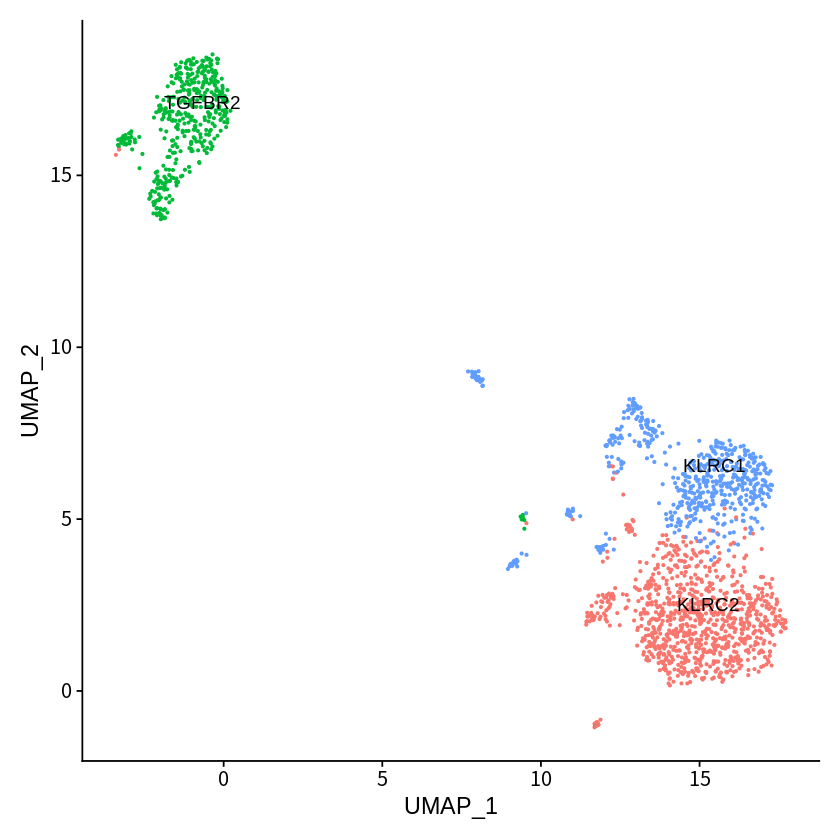

In [24]:
SCLC.NK <- FindNeighbors(SCLC.NK,  reduction="harmony",dims = 1:30)
SCLC.NK <- FindClusters(SCLC.NK,resolution = 0.2)

names(new_label) <- levels(SCLC.NK)
SCLC.NK <- RenameIdents(SCLC.NK, new_label)
DimPlot(SCLC.NK, reduction = "umap", repel=T,label = TRUE, pt.size = 0.5) + NoLegend()
DimPlot(SCLC.NK, reduction = "umap", repel=F,label = TRUE, pt.size = 0.5) ->xxxx

In [25]:
Idents(SCLC.NK) <- factor(Idents(SCLC.NK), levels = c('KLRC2','KLRC1','TGFBR2'))

In [26]:
SCLC.NK[["celltype_celltype"]]<-Idents(SCLC.NK)

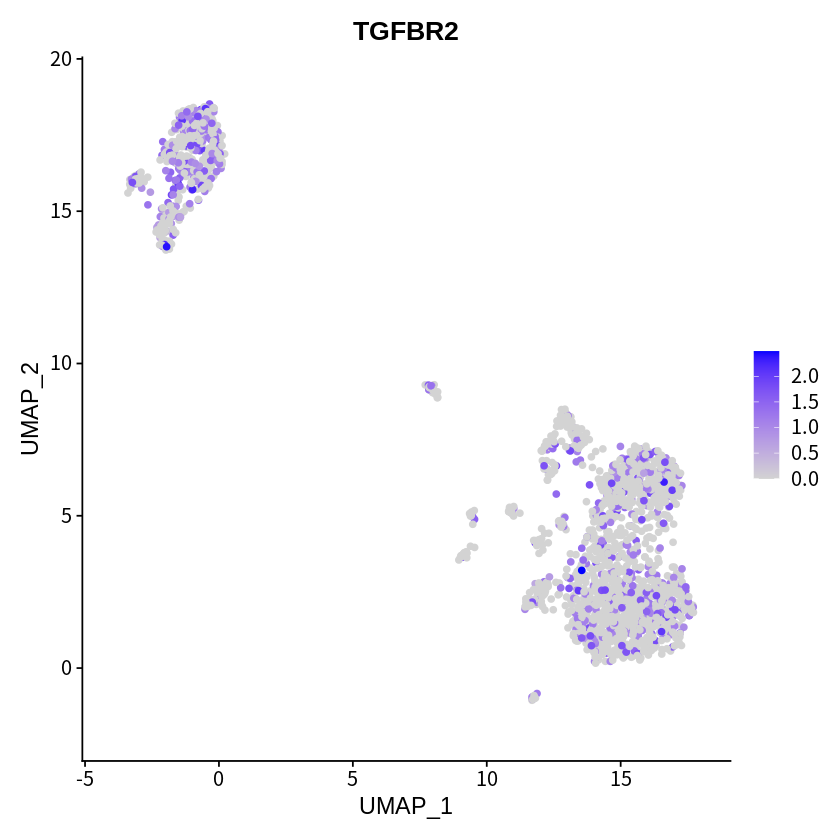

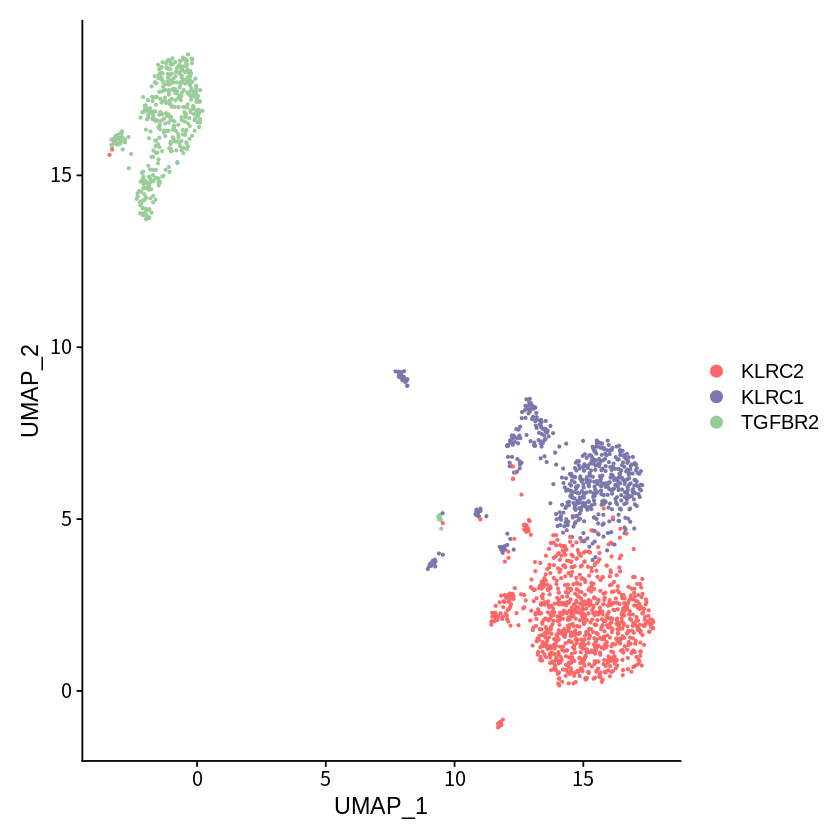

In [40]:
FeaturePlot(SCLC.NK,"TGFBR2",pt.size = 1.5)
DimPlot(SCLC.NK, reduction = "umap",cols=c("#FF6766","#7B76AC","#9ACC99"), repel=T,label = F, pt.size = 0.5) 

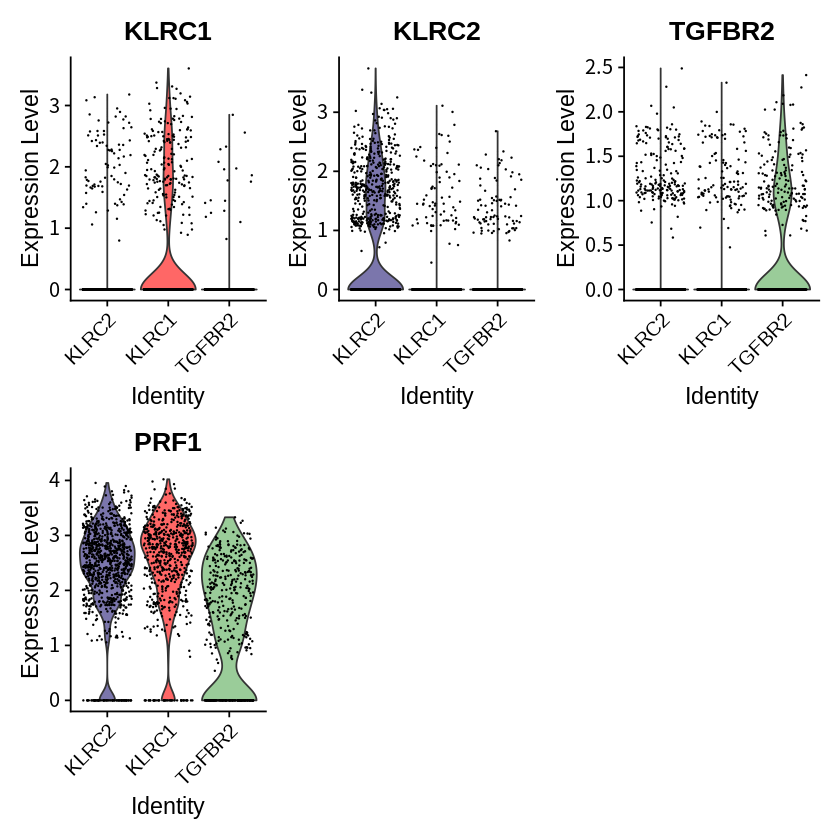

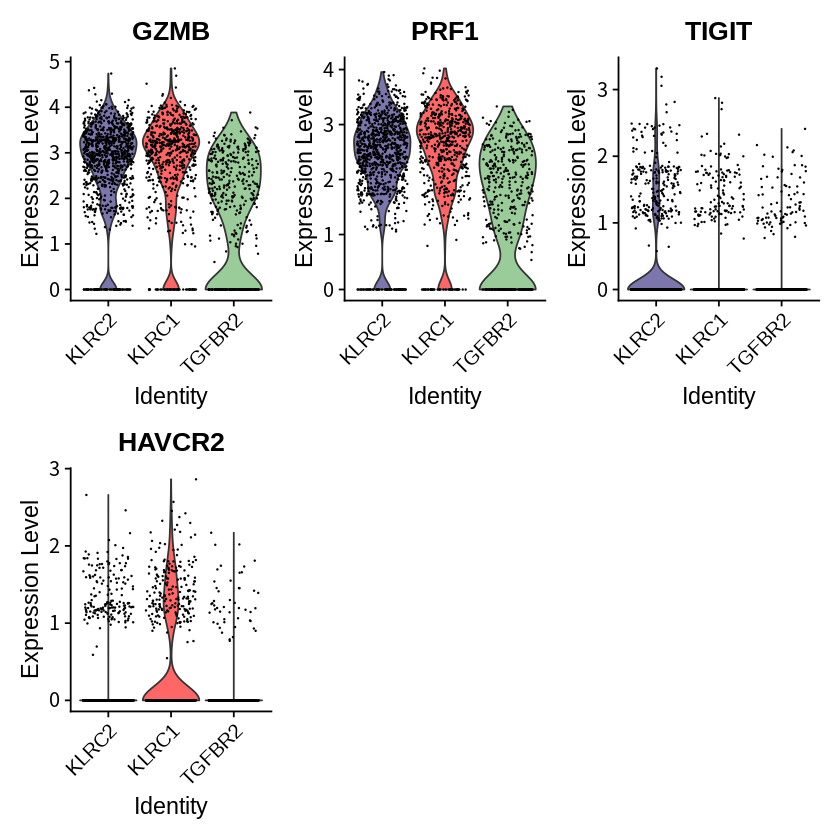

In [44]:
VlnPlot(SCLC.NK,c("KLRC1","KLRC2","TGFBR2","PRF1"),cols =c("#7B76AC","#FF6766","#9ACC99"))
VlnPlot(SCLC.NK,c("GZMB","PRF1","TIGIT", "HAVCR2"),cols =c("#7B76AC","#FF6766","#9ACC99"))

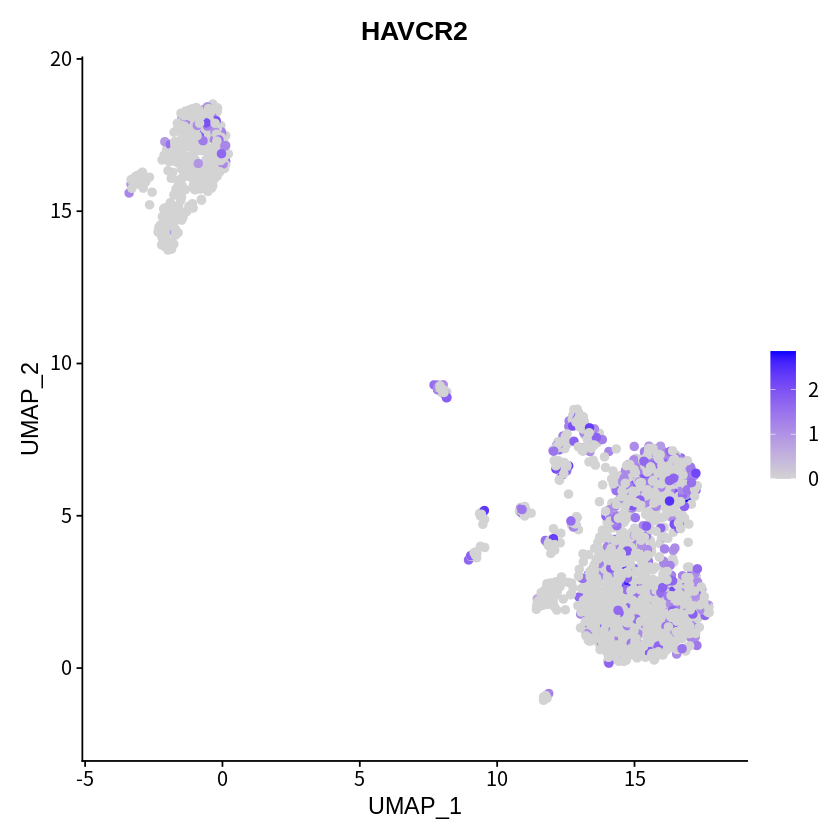

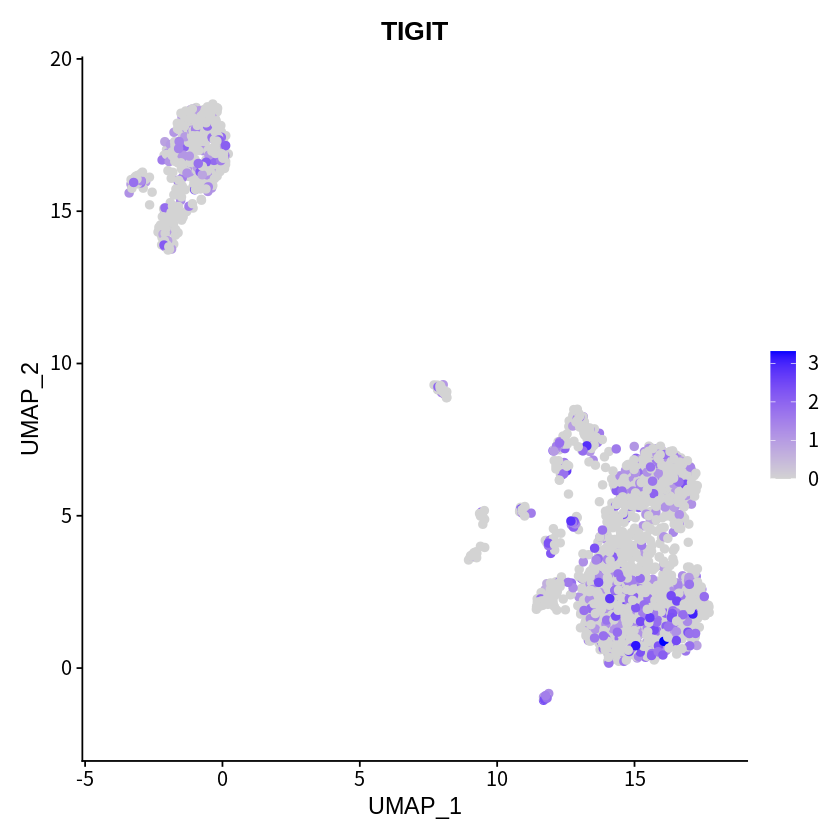

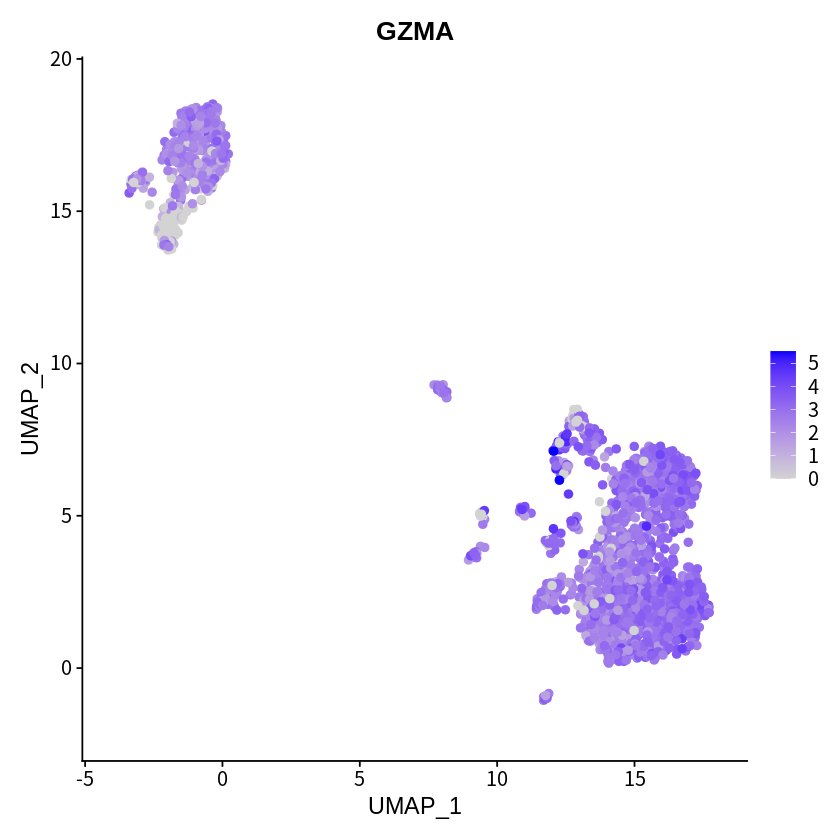

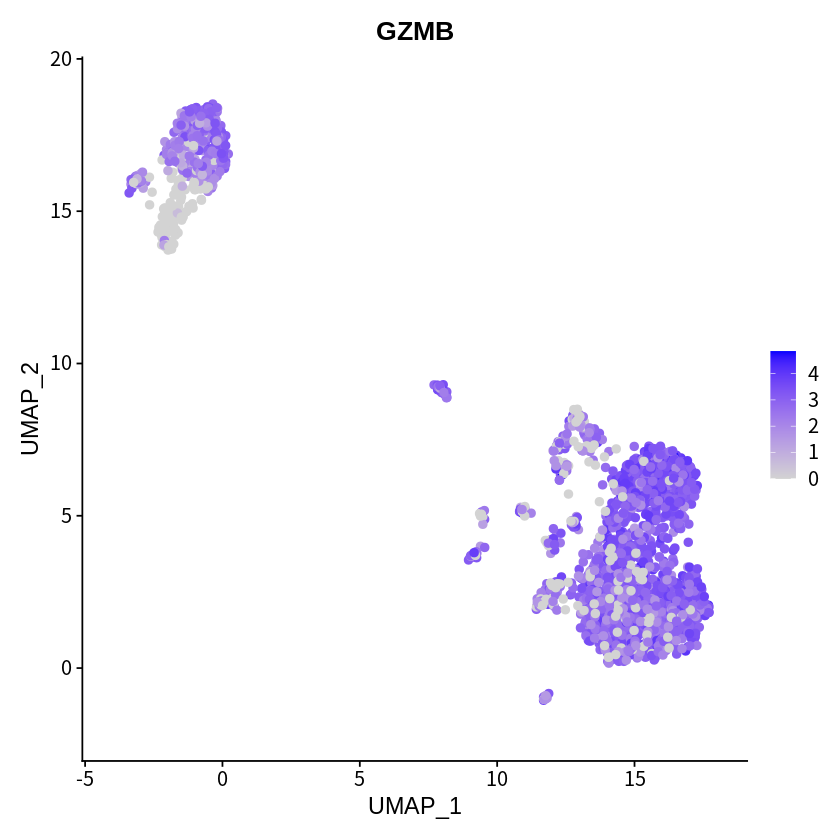

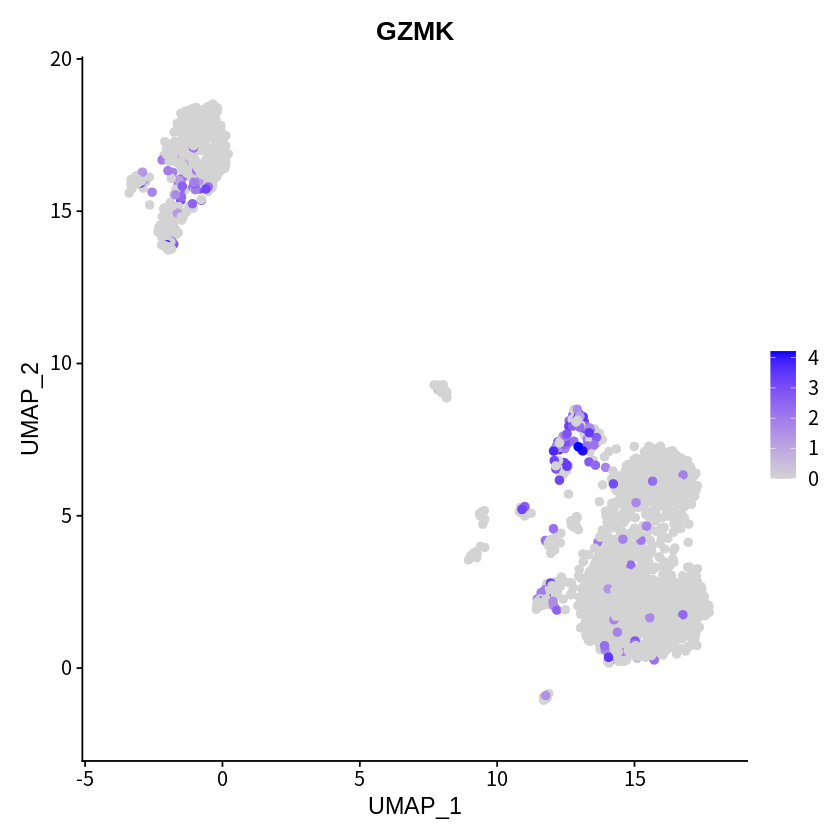

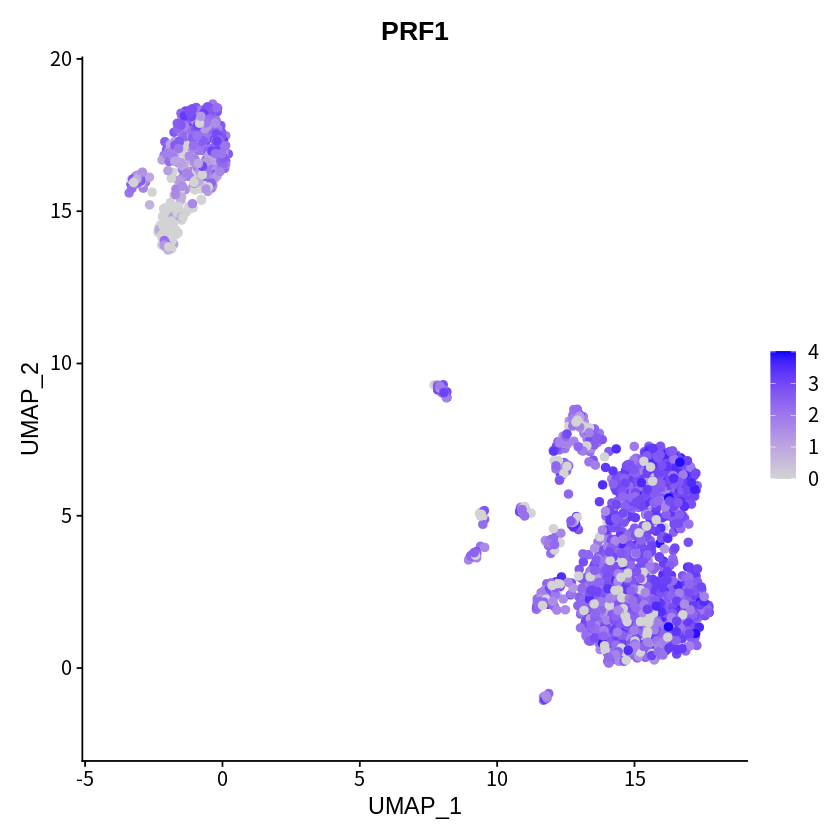

In [47]:
FeaturePlot(SCLC.NK,c("HAVCR2"), pt.size = 2)
FeaturePlot(SCLC.NK,c("TIGIT"), pt.size = 2)
FeaturePlot(SCLC.NK,c("GZMA"), pt.size = 2)
FeaturePlot(SCLC.NK,c("GZMB"), pt.size = 2)
FeaturePlot(SCLC.NK,c("GZMK"), pt.size = 2)
FeaturePlot(SCLC.NK,c("PRF1"), pt.size = 2)

In [55]:
ls()
table(Idents(SCLC.NK))

[1] "cand_gene"   "go"          "k"           "new_label"   "NK.markers" 
[6] "SCLC.filter" "SCLC.NK"     "xxxx"


 KLRC2  KLRC1 TGFBR2 
   935    592    426 

In [56]:
NK.markers_other <- FindMarkers(SCLC.NK, ident.1 ="TGFBR2", min.pct = 0.25)

In [57]:
# write.csv(NK.markers_other, file="table_out/4_NK.markers_other.csv", quote=F)

In [58]:
dim(NK.markers_other)
head(arrange(NK.markers_other, desc(avg_log2FC)), 15)

[1] 1205    5

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S100A8,0.000000e+00,5.849395,0.946,0.055,0.000000e+00
S100A9,0.000000e+00,5.172811,0.967,0.092,0.000000e+00
NAMPT,2.944576e-303,3.944149,0.972,0.119,9.875520e-299
G0S2,0.000000e+00,3.680455,0.810,0.010,0.000000e+00
MNDA,0.000000e+00,3.647600,0.955,0.058,0.000000e+00
CSF3R,0.000000e+00,3.502741,0.948,0.030,0.000000e+00
FCGR3B,0.000000e+00,3.425096,0.951,0.042,0.000000e+00
SAT1,6.750073e-201,3.418230,0.984,0.489,2.263839e-196
FOS,9.204212e-211,3.136777,0.986,0.431,3.086909e-206


In [59]:
c("ACVR1","APC","ARID4B","BCAR3","BMP2","BMPR1A","BMPR2","CDH1","CDK9","CDKN1C","CTNNB1","ENG","FKBP1A","FNTA","FURIN","HDAC1",
  "HIPK2","ID1","ID2","ID3","IFNGR2","JUNB","KLF10","LEFTY2","LTBP2","MAP3K7","NCOR2","NOG","PMEPA1","PPM1A","PPP1CA","PPP1R15A",
  "RAB31","RHOA","SERPINE1","SKI","SKIL","SLC20A1","SMAD1","SMAD3","SMAD6","SMAD7","SMURF1","SMURF2","SPTBN1","TGFB1","TGFBR1",
  "TGIF1","THBS1","TJP1","TRIM33","UBE2D3","WWTR1","XIAP")-> TGFB_resp

In [60]:
inter_gene<-intersect(rownames(SCLC.NK[["RNA"]]), TGFB_resp)
SCLC.NK <- ScaleData( SCLC.NK , features = inter_gene)

unique(SCLC.NK@meta.data[,"celltype_celltype"])->cells

box_res=list()
for(cell in sort(cells))
{

print(cell)
sample =subset(SCLC.NK@meta.data, celltype_celltype ==cell)
rownames(sample)->cell_name
colMeans(as.matrix(SCLC.NK[["RNA"]]@scale.data)[inter_gene, cell_name])->out
box_res[[cell]]<-out

}

Centering and scaling data matrix



[1] "KLRC2"
[1] "KLRC1"
[1] "TGFBR2"


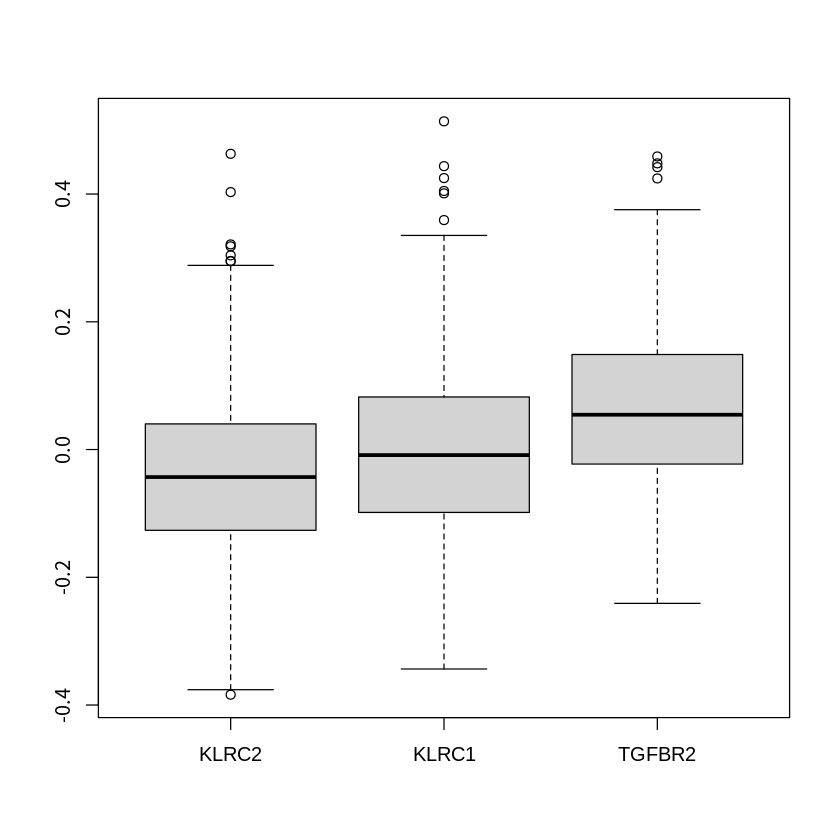

In [61]:
boxplot(box_res)

In [63]:
head(box_res$KLRC1)

S1_AACAAAGGTGACATCT-1 S1_AAGCATCCATACGCAT-1 S1_AATGCCAAGGACCCAA-1 
           0.07701013           -0.04013940           -0.08482793 
S1_ACGGTCGAGGCAGGTT-1 S1_AGGACTTAGTTAACAG-1 S1_AGGCCACGTATAATGG-1 
           0.01538287           -0.01926863           -0.01689837

In [65]:
t.test(box_res$KLRC1,box_res$TGFBR2,paired=F)   

t.test(c(box_res$KLRC1,box_res$KLRC2),box_res$TGFBR2,paired=F)  


	Welch Two Sample t-test

data:  box_res$KLRC1 and box_res$TGFBR2
t = -7.9006, df = 951.42, p-value = 7.642e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.08364476 -0.05035895
sample estimates:
    mean of x     mean of y 
-0.0004382807  0.0665635753 



	Welch Two Sample t-test

data:  c(box_res$KLRC1, box_res$KLRC2) and box_res$TGFBR2
t = -12.757, df = 688.19, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.10473034 -0.07679271
sample estimates:
  mean of x   mean of y 
-0.02419795  0.06656358 


In [68]:
# save 
# write.csv(NK.markers, file="table_out/4_NK.markers.csv",quote=F)
# write.csv(NK.markers_other, file="table_out/4_NK.markers_other.csv",quote=F)
# save(SCLC.NK, file = "data_out/4.SCLC.NK.rdata")


In [2]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 16.04.7 LTS

Matrix products: default
BLAS/LAPACK: /home/inspur/miniconda3/envs/sclc_ldk/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] reticulate_1.22             viridis_0.6.2              
 [3] viridisLite_0.4.0           hrbrthemes_0.8.0           
 [5] forcats_0.5.1               stringr_1.4.0              
 [7] dplyr_1.0.7                 purrr_0.3.4                
 [9] readr_2.1.1                 tidyr_1.1.4